# NONCOVToolbox: Step 3

## Plot the data from the dataset and do explorative data analysis

### Load necessary modules from the NONCOVToolbox src## Preconfig NONCOVToolbox Library

In [4]:
# Get the NONCOVToolbox library and print header
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from sklearn.cluster import KMeans
import pathlib as Path

path_noncov = os.path.abspath(os.path.join('..', 'src'))

if path_noncov not in sys.path:
    sys.path.append(path_noncov)

from noncov import NONCOVToolbox, NONCOVHeader

noncov = NONCOVToolbox()

#NONCOVHeader.print_header()

# Pre work on molecular geometries
from noncov import StructureModifier

# OrcaAnalysis module for postprocessing of DFT calculations
from noncov import OrcaAnalysis

# Graph molecular representations
from noncov import MolecularGraph

# Functions to store data in dataframes
from noncov import MachineLearning

# Show performance and features of various NMR functions in module
from noncov import NMRFunctions

# Display the molecule while its displaced, not yet interactive in Jupyter but interactive in VS Code
from noncov import MolView

# Disable printing
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore printing
def enablePrint():
    sys.stdout = sys.__stdout__

In [5]:
# Get work directory and scratch folder for the output data
current_dir = os.getcwd()
print(f'Current work directory is: {current_dir}')

scratch_dir = os.path.abspath(os.path.join('..', 'scratch'))
print(f'Current scratch directory is: {scratch_dir}')
scratch_dir = OrcaAnalysis().convert_path(scratch_dir)

Current work directory is: C:\Users\ettor\Desktop\NONCOV\results
Current scratch directory is: C:\Users\ettor\Desktop\NONCOV\scratch
Normalized path using os.path: C:/Users/ettor/Desktop/NONCOV/scratch


### Show dataset

In [6]:
datasets_dir = os.path.join(scratch_dir, 'GenerateMLDataset/data/')
print(f'Dataset directory is: {datasets_dir}')
datasets_dir = OrcaAnalysis().convert_path(datasets_dir)

dataset_name = 'fragments_hopt_nmr.csv'

nucprop = os.path.join(datasets_dir, dataset_name)
nucprop_df = pd.read_csv(nucprop)

Dataset directory is: C:/Users/ettor/Desktop/NONCOV/scratch\GenerateMLDataset/data/
Normalized path using os.path: C:/Users/ettor/Desktop/NONCOV/scratch/GenerateMLDataset/data/


In [7]:
# Individual nuclear properties
nucprop_df.head()

Molecule           Atom   x_coord   y_coord   z_coord  \
0  df_cut_4_n1_opt.xyz   Nucleus 7H :  1.004732  0.618235  0.399603   
1  df_cut_4_n1_opt.xyz   Nucleus 8H : -0.479139  0.823720  0.426466   
2  df_cut_4_n1_opt.xyz   Nucleus 9H : -1.139424  1.293590 -0.715278   
3  df_cut_4_n1_opt.xyz  Nucleus 10H : -2.529680  1.410024 -0.731269   
4  df_cut_4_n1_opt.xyz  Nucleus 11H : -3.272787  1.055261  0.391918   

   sigma_iso  sigma_xx  sigma_yy  sigma_zz  dia_sigma_xx  ...  dia_sigma_zz  \
0      28.71     34.44     26.20     25.50         45.09  ...         20.37   
1      28.66     33.20     27.90     24.88         24.68  ...         34.50   
2      25.80     29.45     26.15     21.81         45.32  ...         30.01   
3      25.71     21.87     27.98     27.28         45.53  ...         18.25   
4      23.23     22.20     23.28     24.21         12.13  ...         40.98   

   para_sigma_xx  para_sigma_yy  para_sigma_zz  sigma_11  sigma_22  sigma_33  \
0         -12.17           3.32           5.17     25.50     26.20     34.44   
1          -8.86          -2.88           2.09     24.88     27.90     33.20   
2         -19.56           0.18          -7.79     21.81     26.15     29.45   
3         -18.92          -4.64           4.48     21.87     27.28     27.98   
4          10.96         -20.55         -16.79     22.20     23.28     24.21   

   s_tot_symmetry  span  skew  
0               0  8.94 -0.84  
1               0  8.32 -0.27  
2               0  7.64  0.14  
3               0  6.11  0.77  
4               0  2.01  0.07  

[5 rows x 21 columns]

## Feature selection before ML

We now want to select the features that will be most important for our Machine Learning application.

For Supervised Learning, in our dataset we have 20 features, which maybe are not all needed, but only some of them. We can do feature selection in few ways:

* Correlation Matrix Plot
* Univariate Testing
* Recursive Feature Elimination with Cross Validation

### Correlation Matrix plot

From *Medium* Website: A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

<AxesSubplot:>

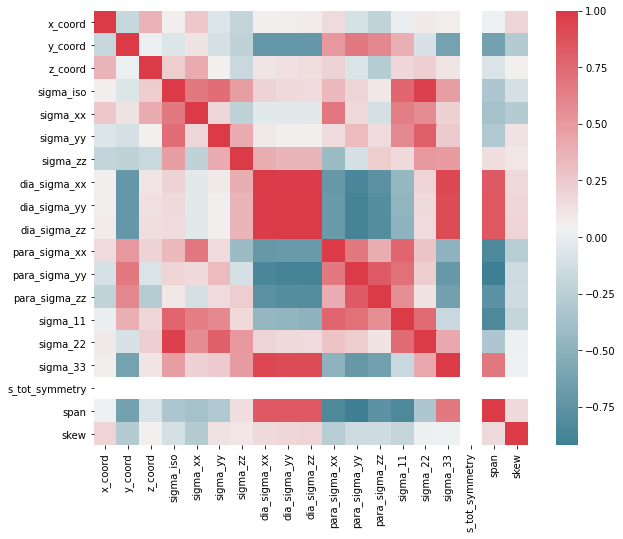

In [8]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df = nucprop_df

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Data Exploration of the dataset
Source: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
import seaborn as sns

In [ ]:
df.describe()

In [ ]:
# Check if any feature has missing values
df.isnull().sum()

In [6]:
# View dataset types
df.dtypes

Molecule           object
Atom               object
x_coord           float64
y_coord           float64
z_coord           float64
sigma_iso         float64
sigma_xx          float64
sigma_yy          float64
sigma_zz          float64
dia_sigma_xx      float64
dia_sigma_yy      float64
dia_sigma_zz      float64
para_sigma_xx     float64
para_sigma_yy     float64
para_sigma_zz     float64
sigma_11          float64
sigma_22          float64
sigma_33          float64
s_tot_symmetry      int64
span              float64
skew              float64
dtype: object

In [ ]:
plt.hist(df['sigma_iso'])
plt.xlabel('ppm / unreferenced')
plt.title('sigma_iso')

In [ ]:
sns.displot(df['sigma_iso'])

print("Skewness: %f" % df['sigma_iso'].skew())
print("Kurtosis: %f" % df['sigma_iso'].kurt())

<AxesSubplot:xlabel='para_sigma_xx', ylabel='sigma_iso'>

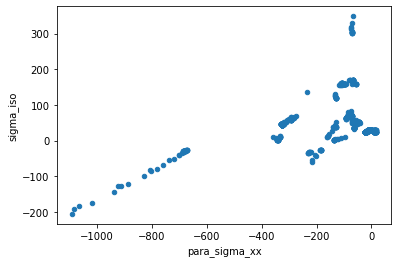

In [11]:
# scatter sigma_iso against 
var = 'para_sigma_xx'
data = pd.concat([df['sigma_iso'], df[var]], axis=1)
data.plot.scatter(x=var, y='sigma_iso')

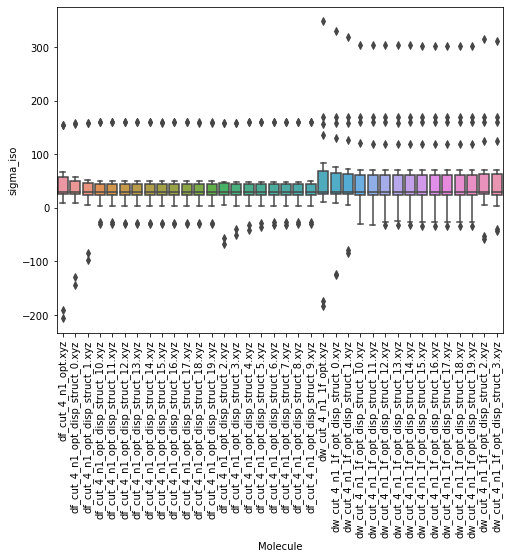

In [12]:
# scatter sigma_iso against 
var = 'Molecule'
data = pd.concat([df['sigma_iso'], df[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="sigma_iso", data=data)
plt.xticks(rotation=90);


In [ ]:
# correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'sigma_iso')['sigma_iso'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\ettor\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


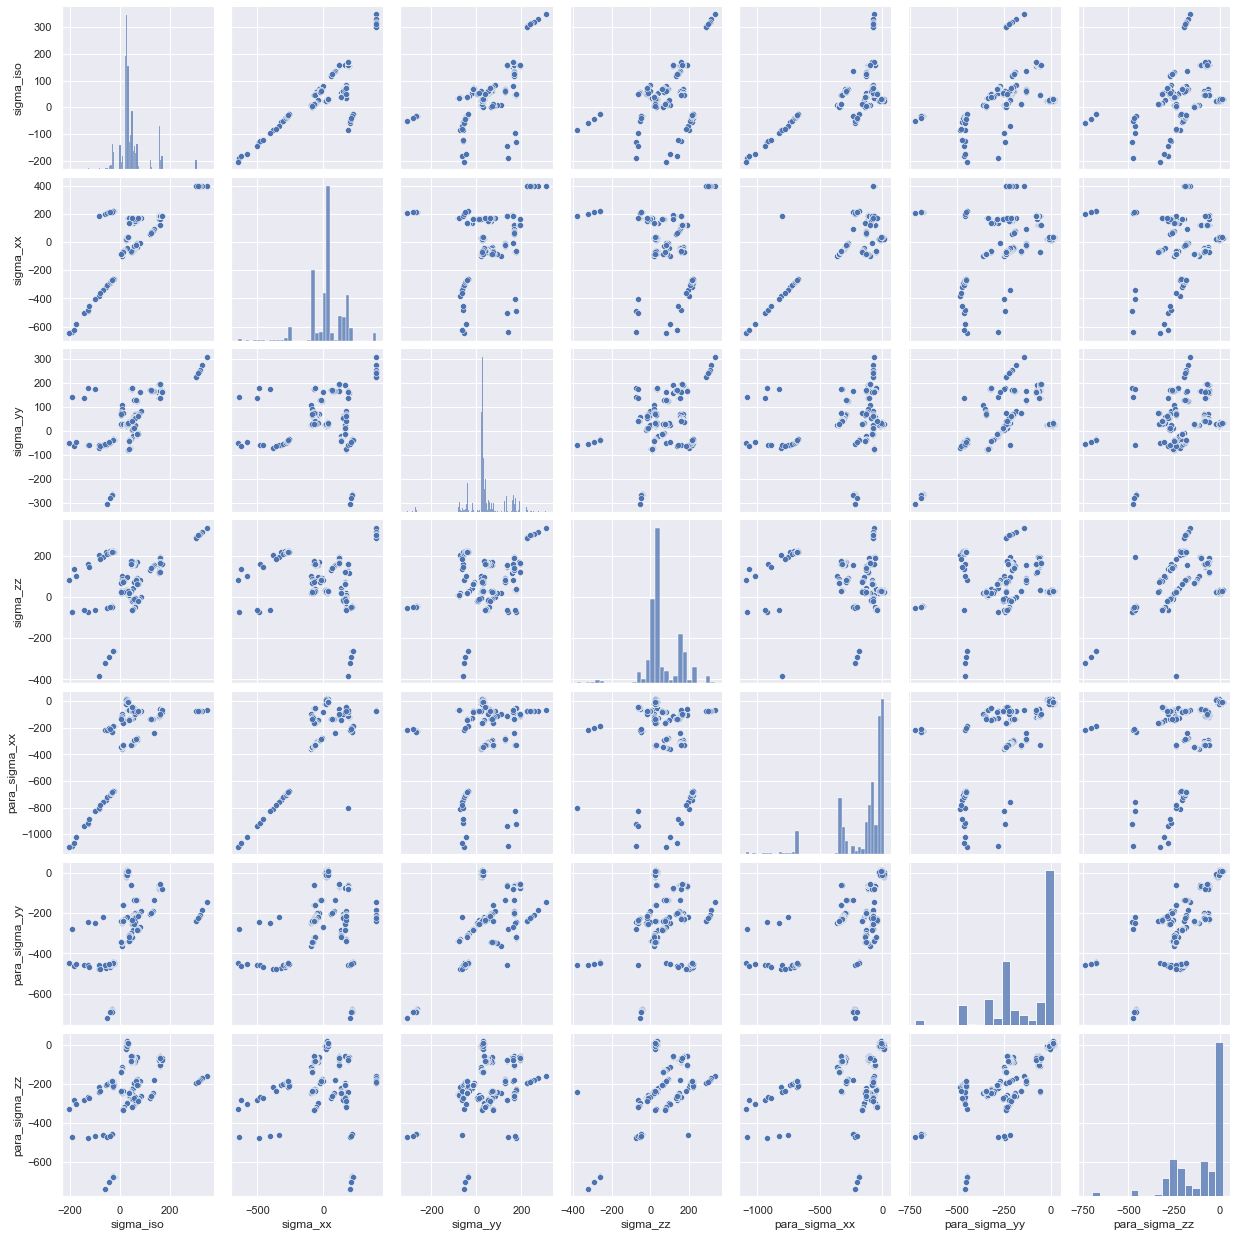

In [13]:
#scatterplot
sns.set()
cols = ['sigma_iso', 'sigma_xx', 'sigma_yy', 'sigma_zz', 'para_sigma_xx', 'para_sigma_yy', 'para_sigma_zz']
sns.pairplot(df[cols], size = 2.5)
plt.show();

C:\Users\ettor\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


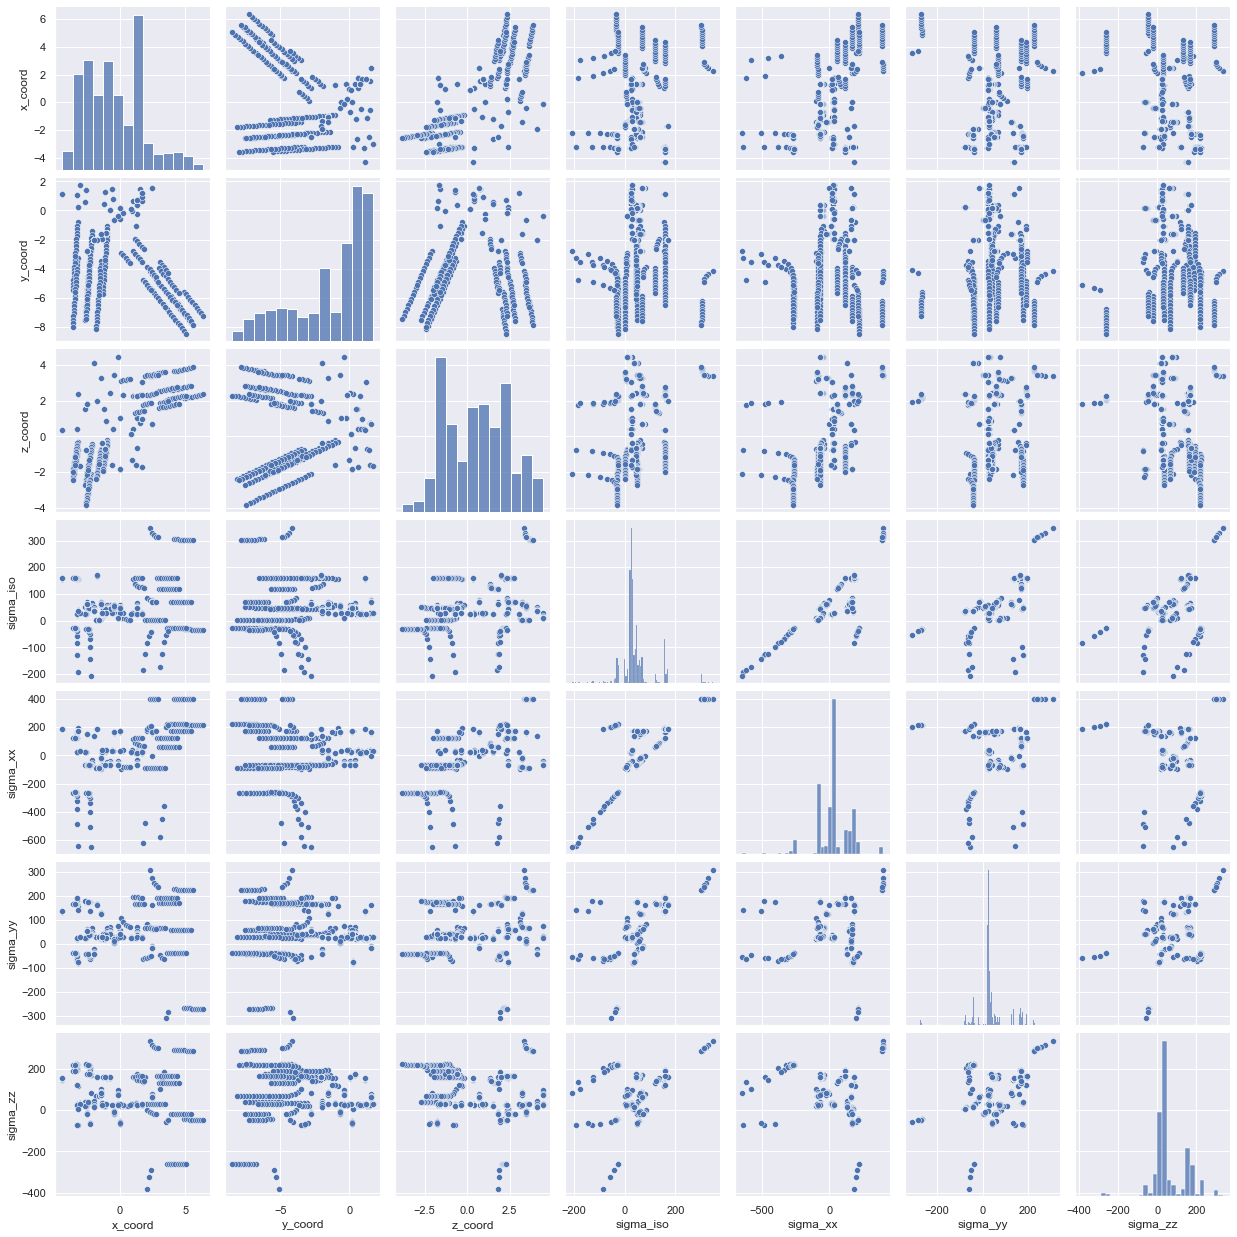

In [6]:
#scatterplot
sns.set()
cols = ['x_coord', 'y_coord', 'z_coord', 'sigma_iso', 'sigma_xx', 'sigma_yy', 'sigma_zz']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [15]:
# Univariate analysis
# The primary concern here is to establish a 
# threshold that defines an observation as an outlier.
# To do so, we'll standardize the data. In this context,
# data standardization means converting data values to have 
# mean of 0 and a standard deviation of 1

#standardizing data
from sklearn.preprocessing import StandardScaler

sigma_iso_scaled = StandardScaler().fit_transform(df['sigma_iso'][:,np.newaxis]);
low_range = sigma_iso_scaled[sigma_iso_scaled[:,0].argsort()][:10]
high_range= sigma_iso_scaled[sigma_iso_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-4.10886087]
 [-3.87403099]
 [-3.74797656]
 [-3.59592133]
 [-3.09450113]
 [-2.83844277]
 [-2.79713773]
 [-2.74678178]
 [-2.34327593]
 [-2.12539593]]

outer range (high) of the distribution:
[[4.26734135]
 [4.26931609]
 [4.27754419]
 [4.28379754]
 [4.29070914]
 [4.40162388]
 [4.44967596]
 [4.53607098]
 [4.69948097]
 [5.00671809]]


<ipython-input-15-42e488dd7afb>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sigma_iso_scaled = StandardScaler().fit_transform(df['sigma_iso'][:,np.newaxis]);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


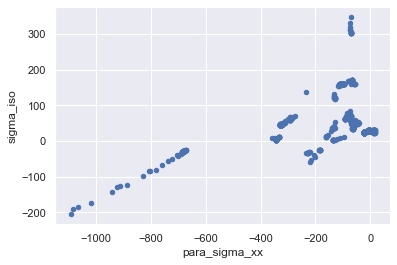

In [18]:
# Bivariate analysis
#bivariate analysis saleprice/grlivarea
var = 'para_sigma_xx'
data = pd.concat([df['sigma_iso'], df[var]], axis=1)
data.plot.scatter(x=var, y='sigma_iso');

In [16]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
skew                0      0.0
dia_sigma_xx        0      0.0
Atom                0      0.0
x_coord             0      0.0
y_coord             0      0.0
z_coord             0      0.0
sigma_iso           0      0.0
sigma_xx            0      0.0
sigma_yy            0      0.0
sigma_zz            0      0.0
dia_sigma_yy        0      0.0
span                0      0.0
dia_sigma_zz        0      0.0
para_sigma_xx       0      0.0
para_sigma_yy       0      0.0
para_sigma_zz       0      0.0
sigma_11            0      0.0
sigma_22            0      0.0
sigma_33            0      0.0
s_tot_symmetry      0      0.0

### Explorative Data Analysis
Source: https://dmol.pub/ml/introduction.html

C:\Users\ettor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sigma_iso', ylabel='Density'>

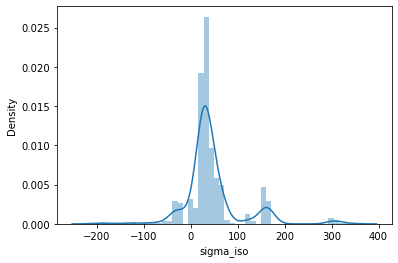

In [9]:
sns.distplot(df.sigma_iso)

In [11]:
# get 3 lowest and 3 highest sigma_iso
sigma_iso_sorted = df.sort_values("sigma_iso")
extremes = pd.concat([sigma_iso_sorted[:3], sigma_iso_sorted[-3:]])

# We need to have a list of strings for legends
legend_text = [
    f"{x.Molecule}: sigma_iso = {x.sigma_iso:.2f}" for x in extremes.itertuples()
]

extremes

Molecule           Atom   x_coord   y_coord  \
21                    df_cut_4_n1_opt.xyz  Nucleus 18O : -2.210609 -2.779859   
20                    df_cut_4_n1_opt.xyz  Nucleus 17O : -3.213046 -3.301478   
485                dw_cut_4_n1_1f_opt.xyz  Nucleus 21O :  1.754477 -4.751627   
539  dw_cut_4_n1_1f_opt_disp_struct_1.xyz  Nucleus 10F :  2.609943 -4.527861   
513  dw_cut_4_n1_1f_opt_disp_struct_0.xyz  Nucleus 10F :  2.444615 -4.342034   
487                dw_cut_4_n1_1f_opt.xyz  Nucleus 10F :  2.279286 -4.156206   

      z_coord  sigma_iso  sigma_xx  sigma_yy  sigma_zz  dia_sigma_xx  ...  \
21  -2.095317    -205.60   -647.23    -52.74     83.17        449.21  ...   
20  -0.736404    -191.33   -641.54    141.01    -73.47        445.69  ...   
485  1.781170    -183.67   -622.17    -64.67    135.83        449.36  ...   
539  3.408427     319.73    398.03    254.31    306.85        460.14  ...   
513  3.383235     329.66    398.37    273.96    316.65        459.12  ...   
487  3.358042     348.33    401.91    308.05    335.03        489.61  ...   

     dia_sigma_zz  para_sigma_xx  para_sigma_yy  para_sigma_zz  sigma_11  \
21         412.57       -1092.88        -447.46        -329.03   -647.23   
20         421.77       -1085.24        -280.39        -475.79   -641.54   
485        418.85       -1067.75        -461.10        -283.02   -622.17   
539        489.50         -73.25        -206.05        -182.61    254.31   
513        489.60         -72.28        -185.67        -172.53    273.96   
487        469.67         -68.50        -141.99        -161.89    308.05   

     sigma_22  sigma_33  s_tot_symmetry    span  skew  
21     -52.74     83.17               0  730.40  0.63  
20     -73.47    141.01               0  782.55  0.45  
485    -64.67    135.83               0  758.00  0.47  
539    306.85    398.03               0  143.72 -0.27  
513    316.65    398.37               0  124.41 -0.31  
487    335.03    401.91               0   93.86 -0.43  

[6 rows x 21 columns]

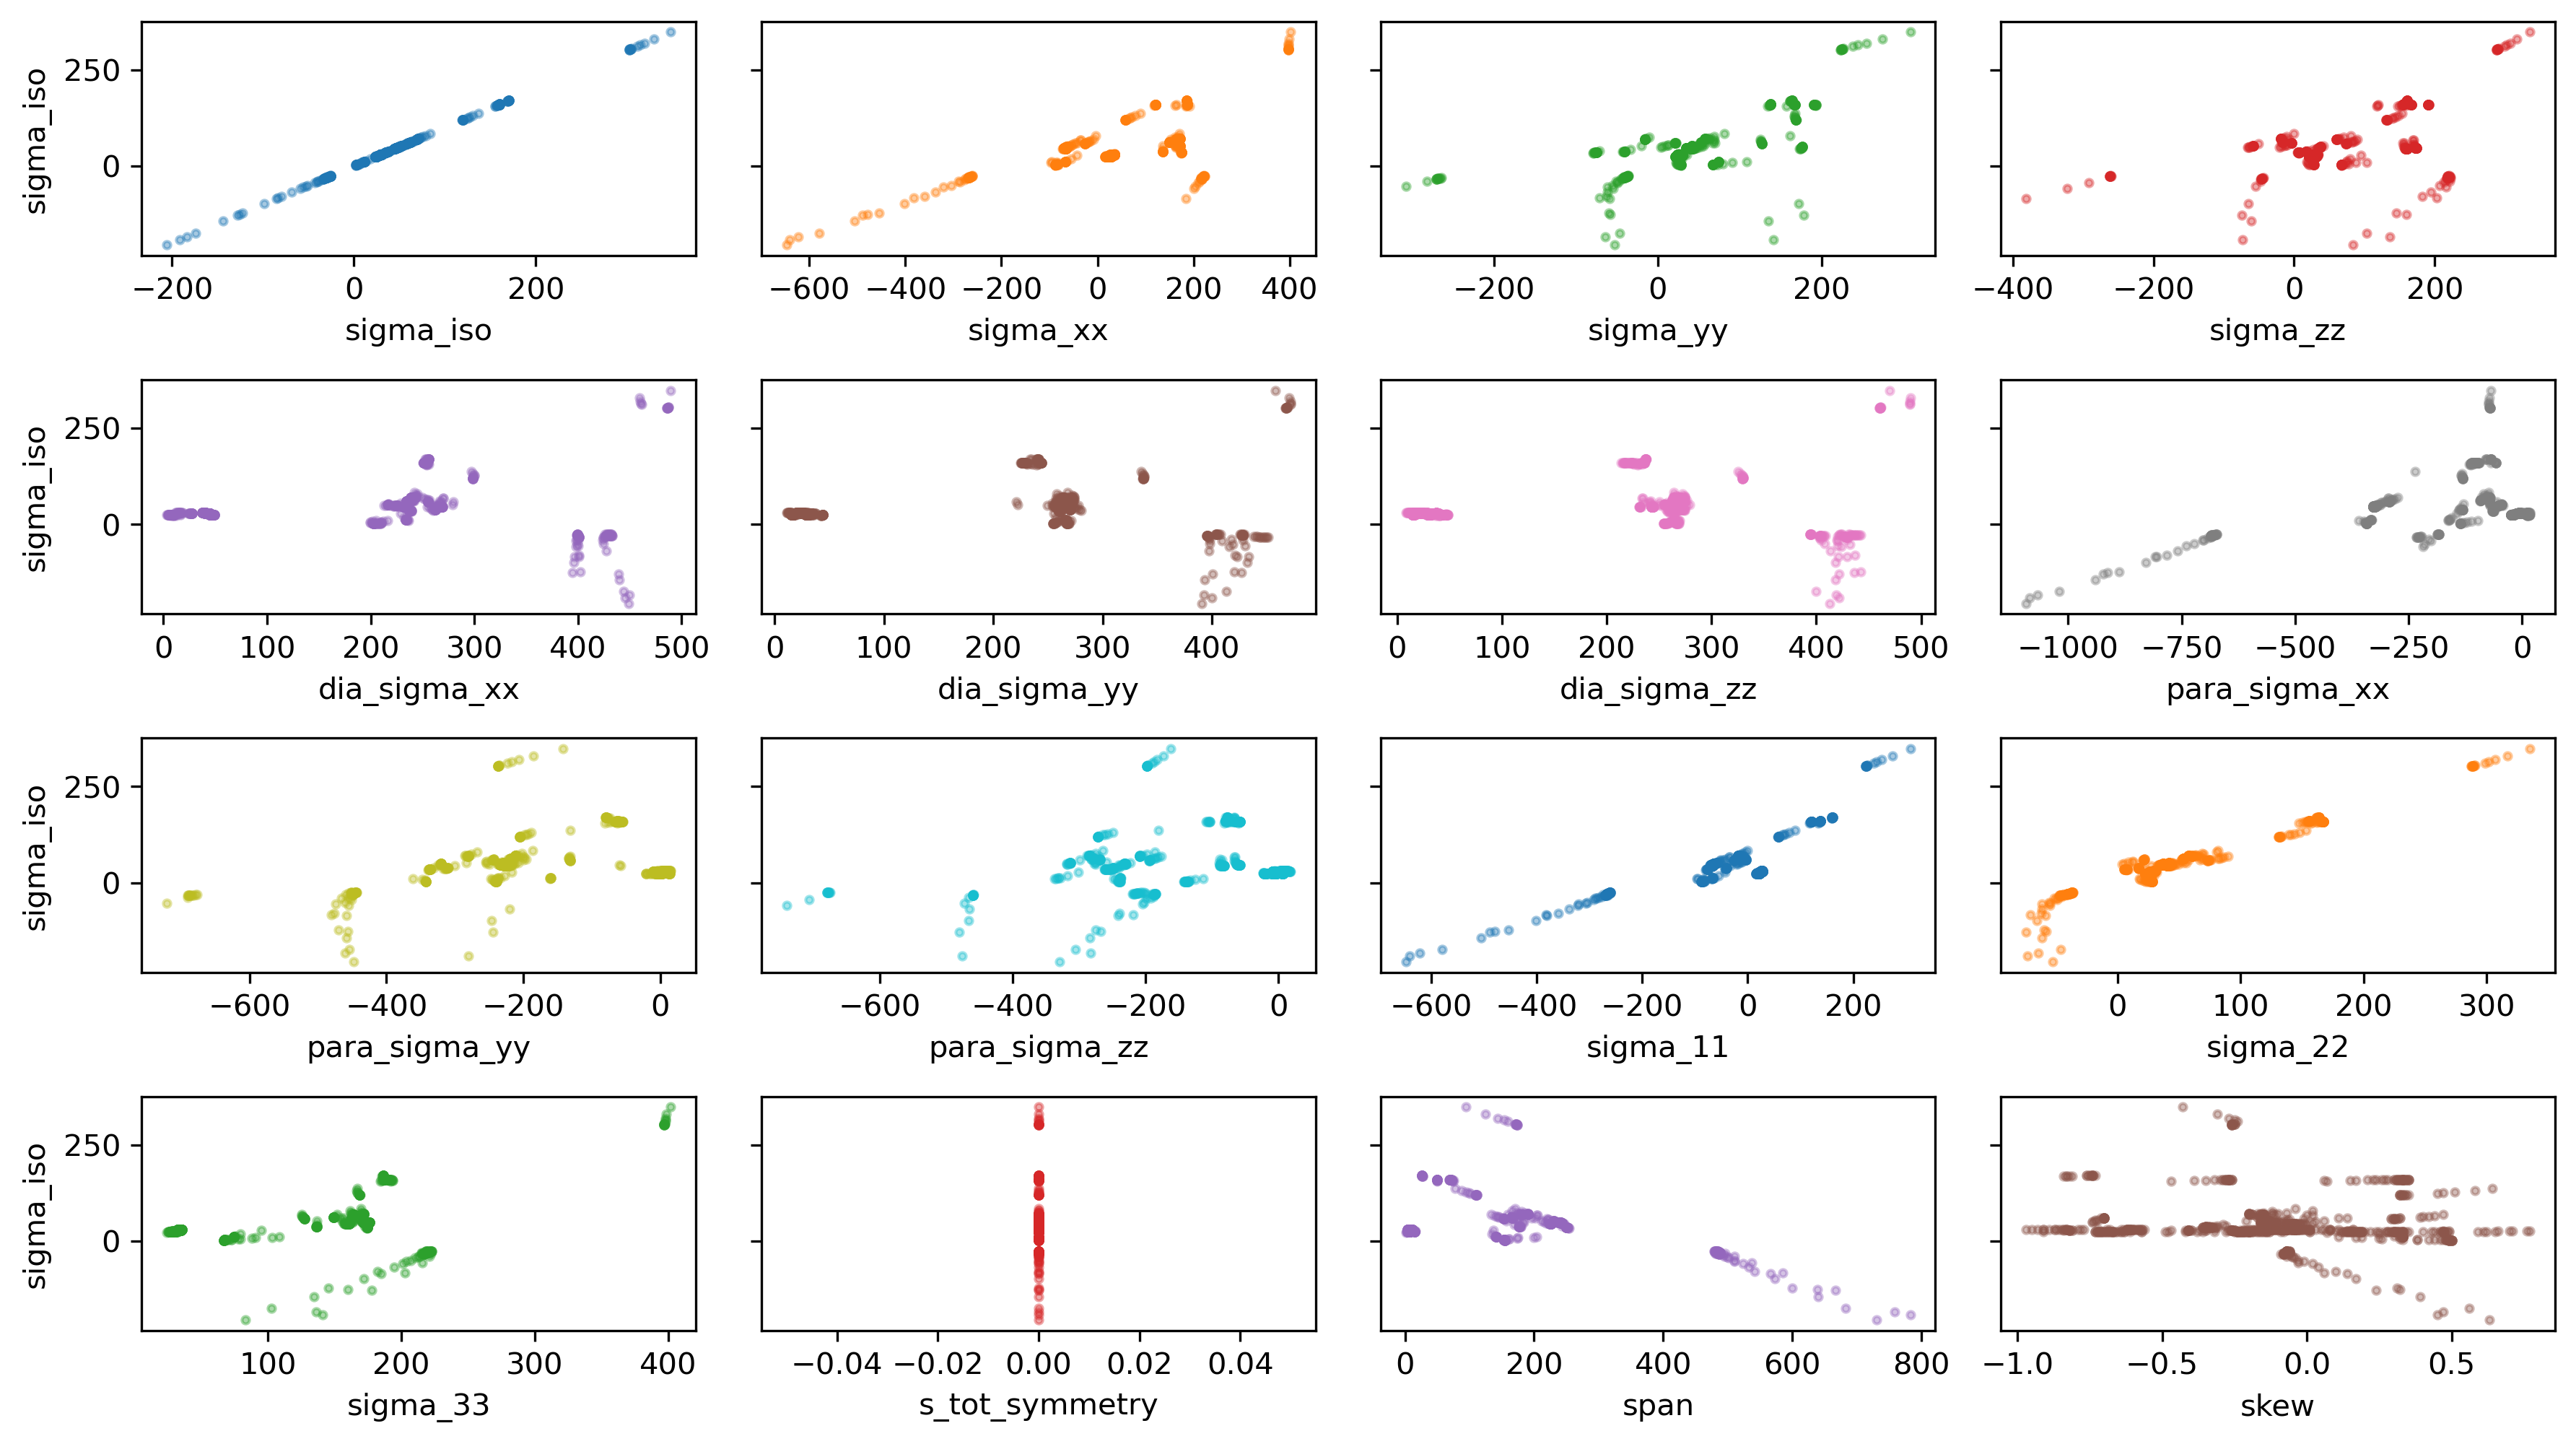

In [12]:
features_start_at = list(df.columns).index("sigma_iso")
feature_names = df.columns[features_start_at:]

fig, axs = plt.subplots(nrows=5, ncols=4, sharey=True, figsize=(12, 8), dpi=300)
axs = axs.flatten()  # so we don't have to slice by row and column
for i, n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        df[n], df.sigma_iso, s=6, alpha=0.4, color=f"C{i}"
    )  # add some color
    if i % 4 == 0:
        ax.set_ylabel("sigma_iso")
    ax.set_xlabel(n)
# hide empty subplots
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

### Shielding changes with distance

In [ ]:
df = nucprop_df

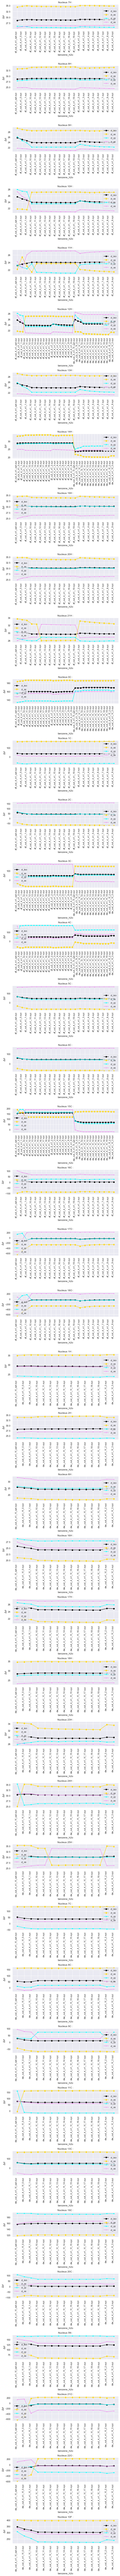

In [7]:
import re

unique_nuclei = df['Atom'].unique()

# Define number of subplots
num_nuclei = len(unique_nuclei)

# Create subplots
fig, axs = plt.subplots(num_nuclei, 1, figsize=(8, 4 * num_nuclei))

# If only one nucleus, axs is not a list, so convert it to list for consistency
if num_nuclei == 1:
    axs = [axs]
    
def remove_prefix(molecule_name, prefix="opt_disp_struct_"):
    return molecule_name.replace(prefix, '')
    
# Loop through each unique nucleus and create a plot
for i, nucleus in enumerate(unique_nuclei):
    # Filter data for the current nucleus
    nucleus_data = df[df['Atom'] == nucleus]
    
    molecule_suffixes = [remove_prefix(molecule) for molecule in nucleus_data['Molecule']]
    
    # Plot sigma_iso against molecule index or name
    axs[i].plot(molecule_suffixes, nucleus_data['sigma_iso'], marker='o', color='black', label='$\sigma$_iso')
    
    axs[i].plot(molecule_suffixes, nucleus_data['sigma_xx'], marker='d', color='gold', label='$\sigma$_xx')
    axs[i].plot(molecule_suffixes, nucleus_data['sigma_yy'], marker='*', color='cyan', label='$\sigma$_yy')
    axs[i].plot(molecule_suffixes, nucleus_data['sigma_zz'], marker='+', color='violet', label='$\sigma$_xx')

    # Set labels and title
    axs[i].set_title(f'{nucleus}')
    axs[i].set_xlabel('benzene_h2o')
    axs[i].set_ylabel('$\Delta$$\sigma$')
    
    axs[i].set_xticks(range(len(molecule_suffixes)))
    axs[i].set_xticklabels(molecule_suffixes, rotation=90, ha="right")
       
    axs[i].legend()

plt.tight_layout()

plt.show()

### Barplots of Shielding changes with distance

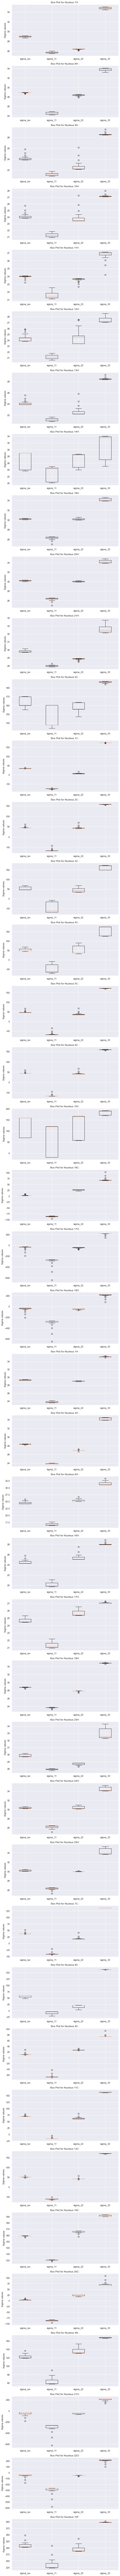

In [8]:
# Here plot bar plots to show how much is the deviation

unique_nuclei = df['Atom'].unique()

# Define number of subplots
num_nuclei = len(unique_nuclei)

# Create subplots
fig, axs = plt.subplots(num_nuclei, 1, figsize=(8, 4 * num_nuclei))

# If only one nucleus, axs is not a list, so convert it to list for consistency
if num_nuclei == 1:
    axs = [axs]

# Loop through each unique nucleus and create a box plot
for i, nucleus in enumerate(unique_nuclei):

    nucleus_data = df[df['Atom'] == nucleus]
    
    # Create a box plot for sigma_iso, sigma_11, sigma_22, sigma_33
    data_to_plot = [nucleus_data['sigma_iso'], 
                    nucleus_data['sigma_11'], 
                    nucleus_data['sigma_22'], 
                    nucleus_data['sigma_33']]
    
    # Create the box plot
    axs[i].boxplot(data_to_plot, labels=['sigma_iso', 'sigma_11', 'sigma_22', 'sigma_33'])
    
    # Set title and labels
    axs[i].set_title(f'Box Plot for {nucleus}')
    axs[i].set_ylabel('Sigma values')
    
# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()


# Unsupervised Learning 

Here we use algortithms to elucidate the structure of the training data. We cluster the data points in groups, and project them in two dimensions to understand their distribution.

<ipython-input-9-928b22181afc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  caxes = pd.plotting.scatter_matrix(nucprop_df, ax=ax)
C:\Users\ettor\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ettor\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ettor\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


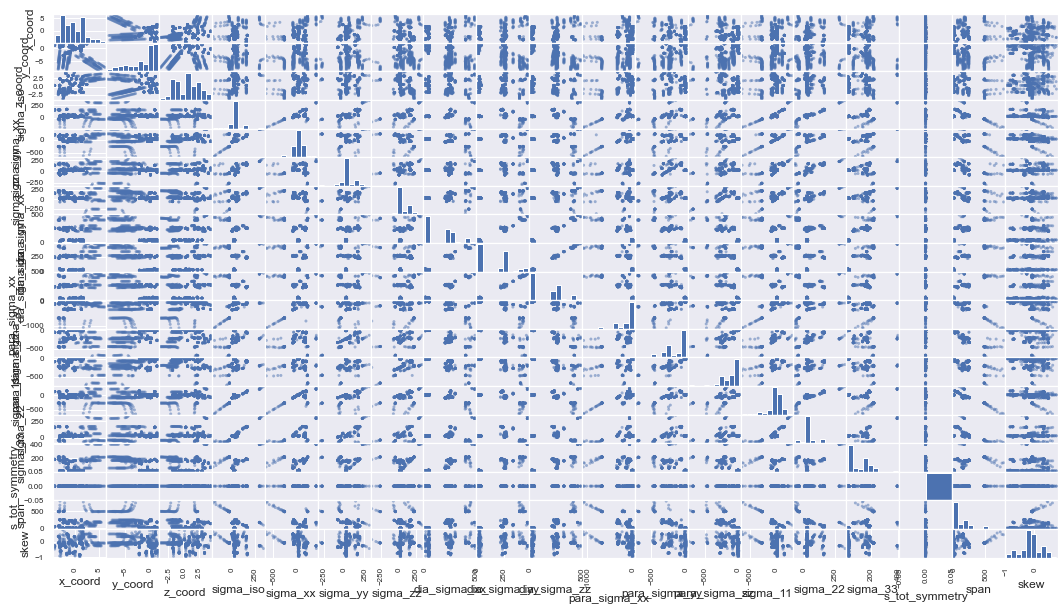

In [9]:
# The following figure shows us a table with scatter plots for each two pairs of features.
# The diagonal plots are the histograms for the variables

fig, ax = plt.subplots(figsize=[18,10])
caxes = pd.plotting.scatter_matrix(nucprop_df, ax=ax)
plt.show()

In [10]:
# clustering algorithm
from sklearn.cluster import KMeans

# linear dimensionality analysis
from sklearn.decomposition import PCA

# nonlinear dimensionality analysis
from sklearn.manifold import TSNE

In [11]:
# Unsupervised learning methods are sensistive to the mean value and the variance of each feature. 
# Here we normalize the data so all the features have zero mean and equal variance
real_nucprop_df = nucprop_df.applymap(lambda x: np.real(x))
normalized_nucprop_df = (real_nucprop_df - real_nucprop_df.mean()) / real_nucprop_df.std()

### K-Means Clustering
Here we cluster the data points into groups. The most straighforward method to do so is K-means. K-means cluster the points in K groups by finding K centers of mass of the data. It separates the space with linear boundaries. 

The "Elbow curve" is a tool that helps to define the suitable number of clusters. When the decrease of the curve slows down it means more clusters are unnecessary. However, the stopping criteria is arbitrary.

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 'median', 'most_frequent', or 'constant'

# Fill NaN values
nonan_db = imputer.fit_transform(normalized_nucprop_df)
 
k_ellbow = []
for E in range(1,15):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(nonan_db)
    score = kmeans.score(nonan_db)
    k_ellbow.append(score)

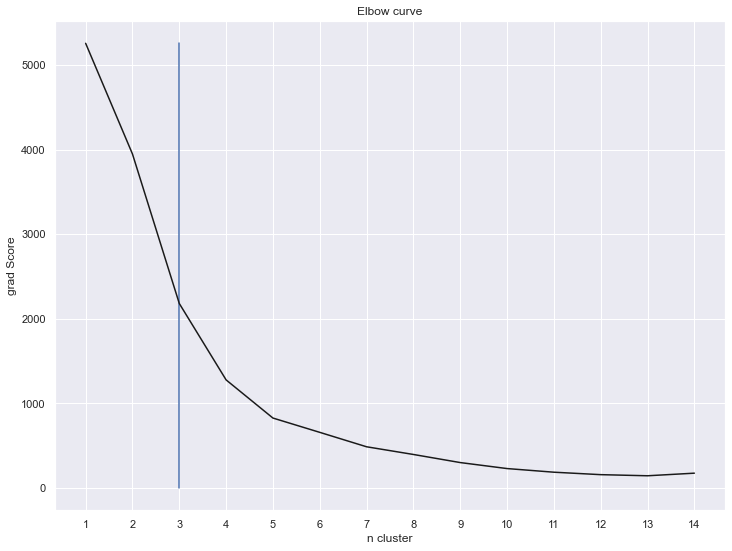

In [13]:
plt.figure(figsize=(12,9))
plt.title('Elbow curve')
plt.xlabel('n cluster')
plt.ylabel('grad Score')
plt.plot([3,3],[0,np.max(np.gradient(k_ellbow))])
plt.xticks(np.arange(1, len(k_ellbow) + 1))
plt.plot(range(1, len(k_ellbow) + 1), np.gradient(k_ellbow), 'k');

In [16]:
## Elbow curve shows significant drop when more than 2 clusters are used.
## Minimum number of cluster for analysis is therefore 3.
##Lets use K-Means Cluster prediction for 3 clusters:
cluster = KMeans(n_clusters=5)
cluster.fit(nonan_db)
cluster_predictions = cluster.predict(nonan_db)

<ipython-input-18-49a97b95a68d>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  caxes = pd.plotting.scatter_matrix(real_nucprop_df, c=cluster_predictions, ax=ax, cmap=plt.cm.get_cmap('rainbow',5),


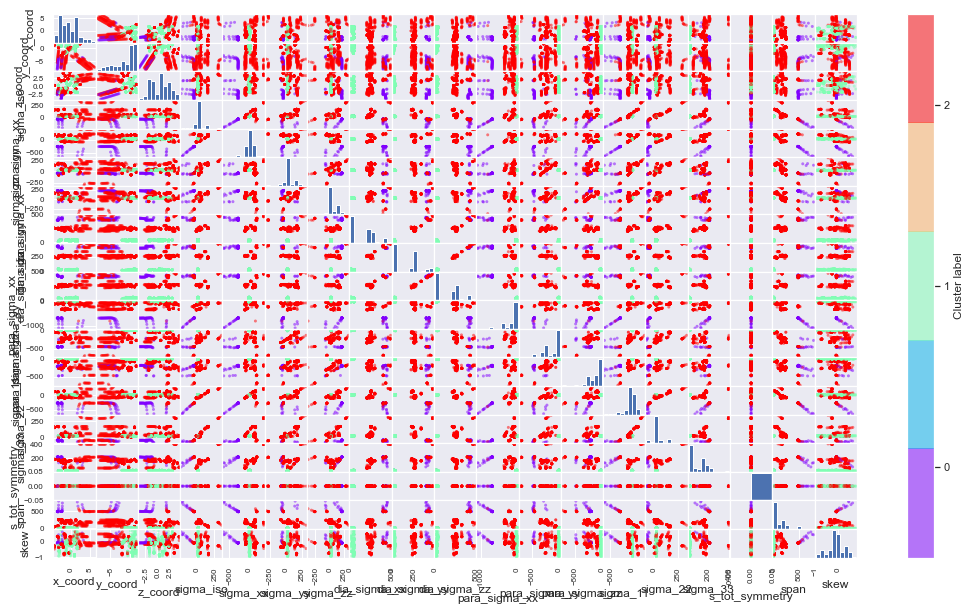

In [18]:
# We can plot the same scatter plots and color the points with the cluster labels.

fig, ax = plt.subplots(figsize=[18,10])
caxes = pd.plotting.scatter_matrix(real_nucprop_df, c=cluster_predictions, ax=ax, cmap=plt.cm.get_cmap('rainbow',5), 
    vmin=-0.5, vmax=2.5)
im = caxes[0,1].collections[0]
cbar = fig.colorbar(im, ax=caxes, ticks=range(4), label='Cluster label')

plt.show()

### Dimensionality Reduction of the Data with Principal Component Analysis.

Two ways to reduce the data dimensionality:

* PCA pojects the data in two (or more) vectors constructed as linear combinations of the original vectors. The vectors chosed are the ones that "capture the most variance", the ones that represent the most relevant directions in the data (in a linear sense)

* TSNE is a family of techniques called manifold learning (https://scikit-learn.org/stable/modules/manifold.html) . It constructs a graph by connecting each point with its neighbours, which is then disentangueled and projected in a lower dimensional space.


In [19]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(nonan_db)

In [20]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(nonan_db)

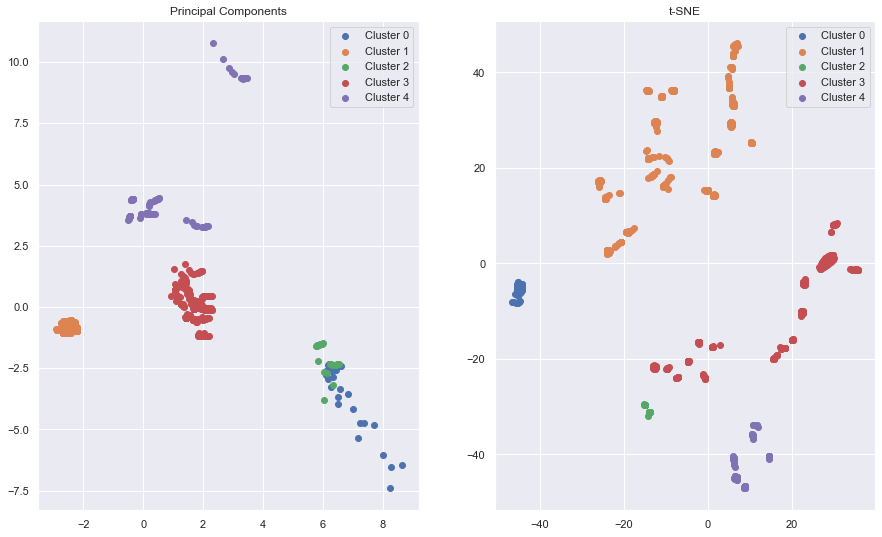

In [21]:
# Compare their 2D projections
fig, axs = plt.subplots(1,2,figsize=(15,9))
axs[0].set_title('Principal Components')
axs[1].set_title('t-SNE')
for cluster in np.unique(cluster_predictions):
    plot1 = axs[0].scatter(pca_data[cluster_predictions == cluster,0], pca_data[cluster_predictions == cluster,1], label='Cluster {}'.format(cluster))
    plot2 = axs[1].scatter(tsne_data[cluster_predictions == cluster,0], tsne_data[cluster_predictions == cluster,1], label='Cluster {}'.format(cluster))
axs[0].legend()
axs[1].legend()
#fig.colorbar(plot2, ax=axs);

In [ ]:
# --- Extract the spin-spin coupling tensor components for each pair of nuclei at each distance iteration --- #

# Initialize variables for tensor components
r_AB = []
ssDSO = []
ssPSO = []
ssFC = []
ssSD = []

# Extract NMR data from each splitted file
for job_number in range (1, n_jobs+1):
    
    orca_splitted_output = OrcaAnalysis().convert_path(os.path.join(scratch_dir, 'OrcaAnalysis/split_orca_output/benzene_H2O_relaxH', f'splitted_orca_job{job_number}.out'))
    
    r_ab, ssdso, sspso, ssfc, sssd = OrcaAnalysis().extract_spin_spin_couplings(orca_splitted_output)
    
    r_AB.append(r_ab)
    ssDSO.append(ssdso)
    ssPSO.append(sspso)
    ssFC.append(ssfc)
    ssSD.append(sssd)

In [ ]:
# --- Application example 2) J Coupling Tensor --- #

# Initialize an empty list to collect data
datapw = []


# Loop through the number of jobs and process each molecule
for job_number in range(n_jobs):
    molecule_name = list_molecules[job_number]
    
    # Extract the distance dictionary for the current job
    distance_dic = r_AB[job_number]
    
    # Check if the distance dictionary is valid
    if isinstance(distance_dic, dict):
        # Loop through each pair and its distance
        for (atom1, atom2), distance in distance_dic.items():
            # Create a row of data for this pair
            row_datapw = {
                'Molecule': molecule_name,
                'Atom_1': atom1,
                'Atom_2': atom2,
                'r_12': distance,
                'x_coord_1' : None, 
                'y_coord_1' : None, 
                'z_coord_1' : None, 
                'x_coord_2' : None, 
                'y_coord_2' : None, 
                'z_coord_2' : None,
                'J_iso' : None,
                'J_FC_11' : None,
                'J_FC_22' : None,
                'J_FC_33' : None,
                'J_DSO_11' : None,
                'J_DSO_22' : None,
                'J_DSO_33' : None,
                'J_PSO_11' : None,
                'J_PSO_22' : None,
                'J_PSO_33' : None,
                'J_SD_11' : None,
                'J_SD_22' : None,
                'J_SD_33' : None,
                'Mayer_BO' : None
            }
            # Append the row to the list
            datapw.append(row_datapw)

    m_bo_dict = mayer_bo[job_number]
        
    if isinstance(m_bo_dict, dict):
        for atom1, pairs in m_bo_dict.items():
            for atom2, bond_order in pairs:
                # Create a row of data for Mayer BO
                row_datapw = {
                    'Mayer_BO': bond_order
                }
                # Append the row to the Mayer BO list
                datapw.append(row_mayer_bo)

# Convert the list of rows to a DataFrame
datadf = pd.DataFrame(datapw)

# Load the existing DataFrame if needed (make sure to define `nucprop_df` earlier)
# Example: nucprop_df = pd.read_csv('existing_data.csv')

# Concatenate with the existing DataFrame
pw_nucprop_df2 = pd.concat([pw_nucprop_df, datadf], ignore_index=True)

# Save the updated DataFrame to a CSV file
#w_nucprop_df.to_csv('updated_nuclear_pairs.csv', index=False)

# Display the updated DataFrame
pw_nucprop_df2

## Visualize output with @MolView

Here is a collection of functions to visualize the shielding tensors values for selected nuclei

In [ ]:
# molecule = 'D:/PhD/Data/DFT/NONCOV/DFT_simulations/codes/scratch/test_structs/benzene_H2O.xyz'
molecule = 'C:/Users/ettor/Desktop/NONCOV/scratch/test_structs/benzene_H2O.xyz'

MolView().plot_3d_molecule(molecule)

In [ ]:
# Plot euler angles and rotated tensor
tensor_pas = np.diag([1.0, 2.0, 3.0])  # Diagonal tensor in PAS
alpha, beta, gamma = 30, 45, 60  # Euler angles in degrees
MolView.plot_3D_tensors_and_axes(tensor_pas, alpha, beta, gamma)


## Postprocess NMR tensors with @NMRFunctions

Perform all the necessary calculations to e.g. transform a shielding tensor from the molecular frame to the PAS and order eigenvalues following either Mehring or Haberlen conventions based on user choices.

In [ ]:
# Tensor to Euler angles
mode = 'AZYZ'
order = 'Ascending'
alpha, beta, gamma, tensor_pas = NMRFunctions().tensor_to_euler(shielding_tensor, eigenvals, eigenvecs, symmetry, mode, order)

In [ ]:
# Generate equivalent sets of angles
NMRFunctions().EqEulerSet(alpha,beta,gamma)

## Modules: MolecularGraph

In [ ]:
fragment1 =(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
fragment2 = (13, 14, 15)

mol_graph = MolecularGraph()

# Parse the XYZ file
atom_types, coordinates = mol_graph.parse_xyz(mol_dir)

# Calculate pairwise distances
distances = mol_graph.calculate_distances(coordinates)

# Detect covalent bonds
covalent_bonds = mol_graph.detect_bonds(atom_types, distances)

# Detect non-covalent interactions
noncovalent_interactions = mol_graph.detect_noncovalent_interactions(atom_types, distances)

# Build the molecular graph
#mol_graph = mol_graph.build_molecular_graph(atom_types, coordinates, covalent_bonds, noncovalent_interactions)

# Visualize the molecular graph
#mol_graph.draw()

# Plots 
mol_graph.plot_bond_dist_matrix(covalent_bonds, distances, atom_types)
mol_graph.plot_noncov_distance_map(noncovalent_interactions, atom_types)

# Build different graphs
covalent_bonds_graph = mol_graph.build_covalent_bonds_graph(atom_types, coordinates, covalent_bonds)
intramolecular_graph = mol_graph.build_intramolecular_graph(atom_types, coordinates, covalent_bonds, noncovalent_interactions)
intermolecular_graph = mol_graph.build_intermolecular_graph(atom_types, coordinates, noncovalent_interactions)

# Draw subplots while preserving atom positions
mol_graph.draw_subplots(covalent_bonds_graph, intramolecular_graph, intermolecular_graph, coordinates)


threshold = 1.6